# Tareas

<div class="alert alert-warning">
Fecha límite de entrega: 30 de Septiembre, 2021 23:59
</div>

## Problema 1

**(a)** Usando **SimPy** demostrar que 

$$
\frac{\partial}{\partial \beta_j} \textbf{J}(\beta) = \frac{1}{m}\sum_{i=1}^{m}\left(\hat{y}(x^{(i)}) - y(x^{(i)})\right) \cdot x^{(i)}_j
$$
Para el caso de $\beta_0, \beta_1$ en $J(\beta_0,\beta_1)$.

# Solución 

In [1]:
# Importo los elementos de la librería sympy que voy a utilizar (* es para función derivada)
import sympy as sym
from sympy import *

Sea  $$\textbf{J}(\mathbf\beta_0, \mathbf\beta_1)$$

la función que defino como una variable  _ecuac_  y  $$\frac{1}{2m}\sum_{i=1}^m ({- \beta_0 - \beta_1 x_i + y_i})^2$$
la parte que defino como una variable  _ecua_ 

In [2]:
# Defino la función de costos que se vió en el documento 0_curve_fitting.ipynb
b0, b1, m, i, x, y = sym.symbols( "beta0, beta1, m, i, x, y")
J = Function ("J")
ecua= (1/(2*m))*sym.summation((-b0-b1*Indexed(x,i)+Indexed(y,i))**2,(i, 1, m))
ecuac=Eq(J(b0, b1),ecua)
ecuac

Eq(J(beta0, beta1), Sum((-beta0 - beta1*x[i] + y[i])**2, (i, 1, m))/(2*m))

**1)** Veamos que para el caso $\beta_0$  la derivada de primer orden de  $$\textbf{J}(\mathbf\beta_0, \mathbf\beta_1)$$ 
queda de la siguente manera

In [3]:
# Obtenemos la primer derivada con respecto a beta0 de la función J
derivadab0=Eq(diff(J(b0,b1),b0),diff(ecua,b0))
derivadab0

Eq(Derivative(J(beta0, beta1), beta0), Sum(2*beta0 + 2*beta1*x[i] - 2*y[i], (i, 1, m))/(2*m))

Simplificando tenemos 

In [4]:
# Simplificando, se elimina el número 2 y así llegamos a la expresión que queremos demostrar
sym.simplify(derivadab0)

Eq(Derivative(J(beta0, beta1), beta0), Sum(beta0 + beta1*x[i] - y[i], (i, 1, m))/m)

**2)**  Veamos que para el caso  $\beta_1$  la derivada de primer orden de  $$\textbf{J}(\beta_0, \beta_1)$$
queda de la siguiente manera

In [5]:
# Sacamos derivada parcial de J con respecto a Beta1
derivadab1=Eq(diff(J(b0,b1),b1),diff(ecua,b1))
derivadab1

Eq(Derivative(J(beta0, beta1), beta1), Sum(-2*(-beta0 - beta1*x[i] + y[i])*x[i], (i, 1, m))/(2*m))

De igual forma al simplificar obtenemos la expresión

In [6]:
sym.simplify(derivadab1)

Eq(Derivative(J(beta0, beta1), beta1), Sum((beta0 + beta1*x[i] - y[i])*x[i], (i, 1, m))/m)

Por lo tanto, para los casos  $\beta_0$  y  $\beta_1$  con **1)** y **2)** queda demostrada la igualdad de
$$\frac{\partial}{\partial\beta_j}\textbf{J}(\beta_j) = \frac{1}{m}\sum_{i=1}^m(\hat{y}x^{i} - yx^{i})\cdot x^{i}_j$$

## Problema 2

Usando el ejemplo de la clase ( i.e. Los archivos `edad.dat` y `altura.dat` contienen las mediciones de las estaturas (en metros) de varios niños entre las edad de 2 y 8 años. Cada _tupla_ de altura y edad, constituyen un ejemplo de entrenamiento $(x^{(i)}, y^{(i)})$ de nuestros datos. Hay $m = 50$ datos para entrenar que usaremos para realizar un modelo de regresión lineal. ) :

**(a)** Grafique $\textbf{J}(\beta)$ del ejercicio en $3D$ y en una gráfica de contorno.

In [7]:
# Importo numpy para tomar los datos de edad y altura como tuplas y plt para graficar
%pylab inline
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d.axes3d import Axes3D
from ipywidgets import interact, fixed, widgets

Populating the interactive namespace from numpy and matplotlib


/opt/conda/lib/python3.9/site-packages/IPython/core/magics/pylab.py:159: UserWarning: pylab import has clobbered these variables: ['sign', 'sqrt', 'cosh', 'vectorize', 'diff', 'det', 'tan', 'exp', 'ones', 'plot', 'interactive', 'source', 'zeros', 'Circle', 'gamma', 'product', 're', 'seterr', 'diag', 'binomial', 'trace', 'shape', 'plotting', 'beta', 'transpose', 'roots', 'nan', 'eye', 'Polygon', 'solve', 'poly', 'prod', 'gcd', 'sinc', 'take', 'trunc', 'minimum', 'reshape', 'sinh', 'fft', 'Number', 'ifft', 'flatten', 'lcm', 'partition', 'conjugate', 'floor', 'maximum', 'log', 'invert', 'cos', 'tanh', 'sin', 'var', 'Line2D', 'pi', 'cbrt']
`%matplotlib` prevents importing * from pylab and numpy
  warn("pylab import has clobbered these variables: %s"  % clobbered +


In [8]:
# Cargo los datos en variables tipo numéricas para trabajar con ellas
X = np.loadtxt("edad-Copy1.dat")
Y = np.loadtxt("altura-Copy1.dat")

OSError: altura-Copy1.dat not found.

In [9]:
# Defino la función J con variables iterables
def funcionJ(beta0,beta1):
    costo= 0
    for n in range(len(X)):
        costo += (Y[n] - beta0 - beta1*X[n])**2/(2*len(X))
    return costo

In [10]:
# Defino las betas como unos aranges para que me dé los parámetros que puede tomar  
b0= np.arange(-2,3,.01)  # arange de numpy me da vectores con parametro de diferencia
b1= np.arange(-2,2,.01)
B0,B1= np.meshgrid(b0,b1) # convierte el arreglo en matriz para poder usar la funcion J
Costo=funcionJ(B0,B1)

NameError: name 'Y' is not defined

Text(0.5, 0, 'Función de costo(J)')

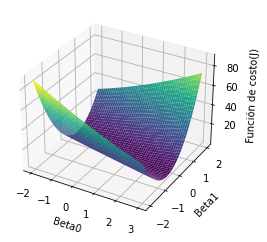

In [284]:
# Graficamos en tres dimensiones la función J que depende de 2 variables
fig = plt.figure()
ax = fig.add_subplot(1,1,1,projection="3d")
ax.plot_surface(B0,B1,Costo,cmap="viridis")
ax.set_xlabel("Beta0")
ax.set_ylabel("Beta1")
ax.set_zlabel("Función de costo(J)")

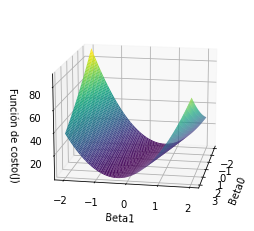

In [285]:
# Cambiamos el ángulo de visión para ver el mínimo en la curva con más precisión
ax.view_init(15,10)
fig

Text(0.5, 0, 'Función de costo(J)')

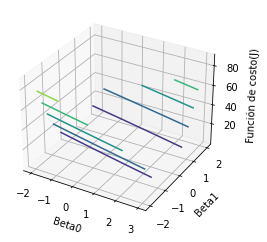

In [293]:
# Hacemos la gráfica de contorno
fig2 = plt.figure()
ax = fig2.add_subplot(1,1,1,projection="3d")
ax.contour3D(B0,B1,Costo,cmap="viridis")
ax.set_xlabel("Beta0")
ax.set_ylabel("Beta1")
ax.set_zlabel("Función de costo(J)")

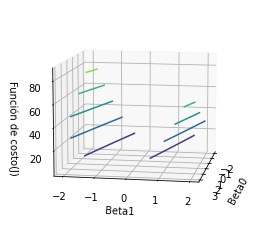

In [294]:
ax.view_init(10,10)
fig2

Text(0, 0.5, 'Beta 1')

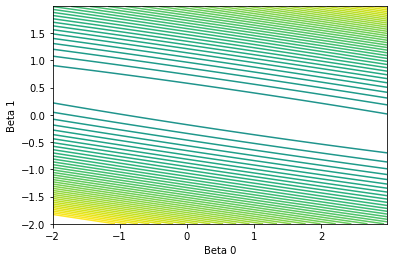

In [296]:
# Hacemos gráfica de contorno en dos dimensiones para ver el punto óptimo posteriormente
fig3=plt.figure()
plt.contour(B0,B1,Costo, levels=np.arange(-80,80,2), cmap="viridis")
plt.xlabel("Beta 0")
plt.ylabel("Beta 1")

**(b)** Indique con un punto el valor de $\textbf{J}(\beta)$ en la última iteración.

In [58]:
# Hacemos la clase regresión lineal y la función gradiente descendt dentro de ella
class Regresionlineal:
    def __init__(self, alpha, max_iters, tols):
        self.alpha=alpha
        self.max_iters=max_iters
        self.tols=tols
        self.breaking_iteration= None
        self.historia={"costo":[],"beta":[]}
        
    def gradientdescent(self,x,y):
        unos = np.ones((x.shape[0],1))
        Xt = x.reshape(x.shape[0],1)
        Xt = np.concatenate((unos, Xt), axis = 1)
        self.i = 0
        prep_j = 0
        m,n = Xt.shape
        self.beta = np.zeros(n)
        
        while self.i < self.max_iters:
            self.beta = self.beta - self.alpha* self.gradiente(Xt,y)
            
            J = self.costo(Xt,y)
            
            if abs(J - prep_j) <= self.tols:
                print ("La función convergió con beta: %s en la iteración %i" % (str(self.beta), self.i))
                self.breaking_iteration= self.i
                break
            else:
                prep_j = J
            self.historia["costo"].append(J)
            self.historia["beta"].append(self.beta)
            self.i += 1
            
    def hipotesis(self, x):
        return np.dot(x, self.beta)
    
    def costo(self, x, y):
        m = x.shape[0]
        error = self.hipotesis(x) - y
        return np.dot(error.T, error)/(2*m)
    
    def gradiente(self, x, y):
        m = x.shape[0]
        error = self.hipotesis(x) - y
        return np.dot(x.T, error)/m
    
    def Graficar(x,y,R):
        modelo = lambda x,b,m: b + m*x
        iteracion = R.i-1
        Beta = R.historia["beta"][iteracion]
        plt.scatter(x, y, label = "Datos")
        plt.plot(x, modelo(x, Beta[0], Beta[1]))

In [290]:
regresion1=Regresionlineal(0.003,10000000,0.000000000000000000000001)
regresion1.gradientdescent(X,Y)

La función convergió con beta: [0.75016232 0.06388121] en la iteración 48017


In [292]:
# El punto mínimo u óptimo es justo el punto de la última iteración, por eso se toman los últimos valores de beta 0 y beta 1 dentro de la clase Regresionlineal
puntominimo=(regresion1.beta[0],regresion1.beta[1],funcionJ(regresion1.beta[0],regresion1.beta[1]))
puntominimo

(0.7501623216325016, 0.06388120500949708, 0.0009870699732786221)

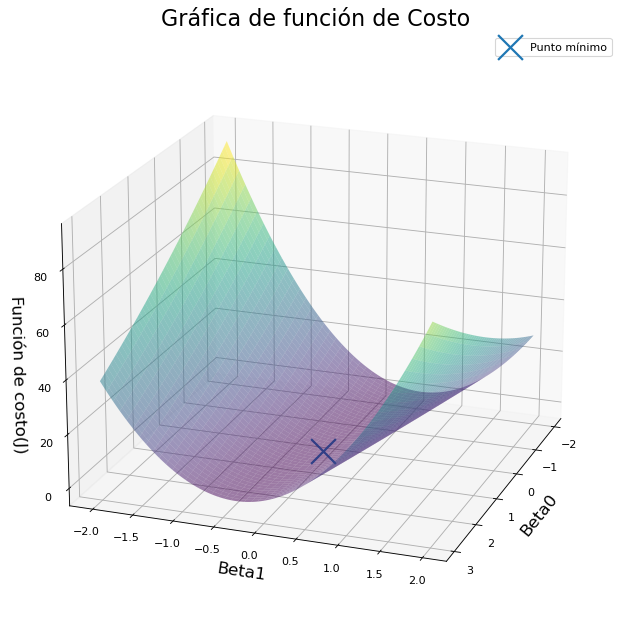

In [304]:
# Graficamos en 3D marcando el punto mínimo resultante de la última iteración
fig4 = plt.figure(figsize=(15,10), dpi=80)
ax = fig4.add_subplot(1,1,1, projection="3d")
ax.plot_surface(B0,B1,Costo,cmap="viridis",alpha=.5)
ax.scatter(puntominimo[0],puntominimo[1],puntominimo[2],linewidths=2,marker="x",s=500,label="Punto mínimo")
ax.view_init(20,20)
ax.set_title("Gráfica de función de Costo", fontsize= 20)
ax.set_xlabel("Beta0",fontsize=15)
ax.set_ylabel("Beta1", fontsize=15)
ax.set_zlabel("Función de costo(J)", fontsize= 15)
ax.legend()

Text(0, 0.5, 'Beta 1')

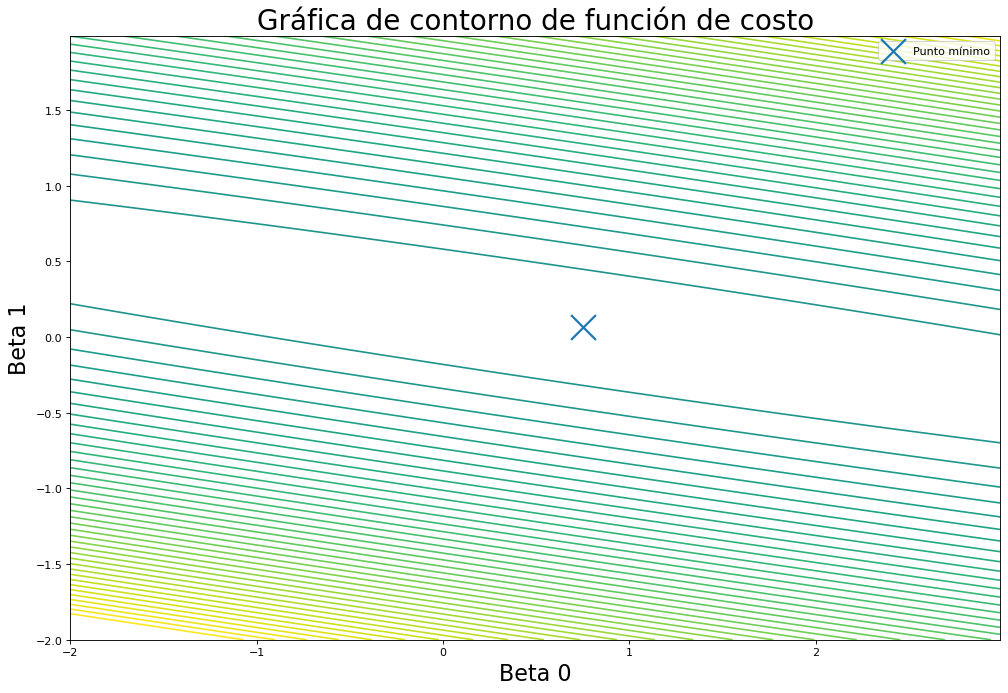

In [306]:
# Hacemos lo mismo con la gráfica de contorno
fig5 = plt.figure(figsize=(15,10), dpi=80)
plt.contour(B0,B1,Costo, levels=np.arange(-80,80,2), cmap="viridis")
plt.scatter(puntominimo[0],puntominimo[1],linewidths=2,marker="x",s=500,label="Punto mínimo")
plt.legend()
plt.title("Gráfica de contorno de función de costo", fontsize=25)
plt.xlabel("Beta 0", fontsize=20)
plt.ylabel("Beta 1", fontsize=20)

**(c)** Modifique el _widget_ para mostrar conforme pasan las iteraciones como el valor de $\textbf{J}(\beta)$ se acerca al mínimo en la gráfica de contorno.


interactive(children=(IntSlider(value=24001, description='iteracion', max=48016, min=1, step=10), Output()), _…

<function __main__.Iteracioncosto(iteracion)>

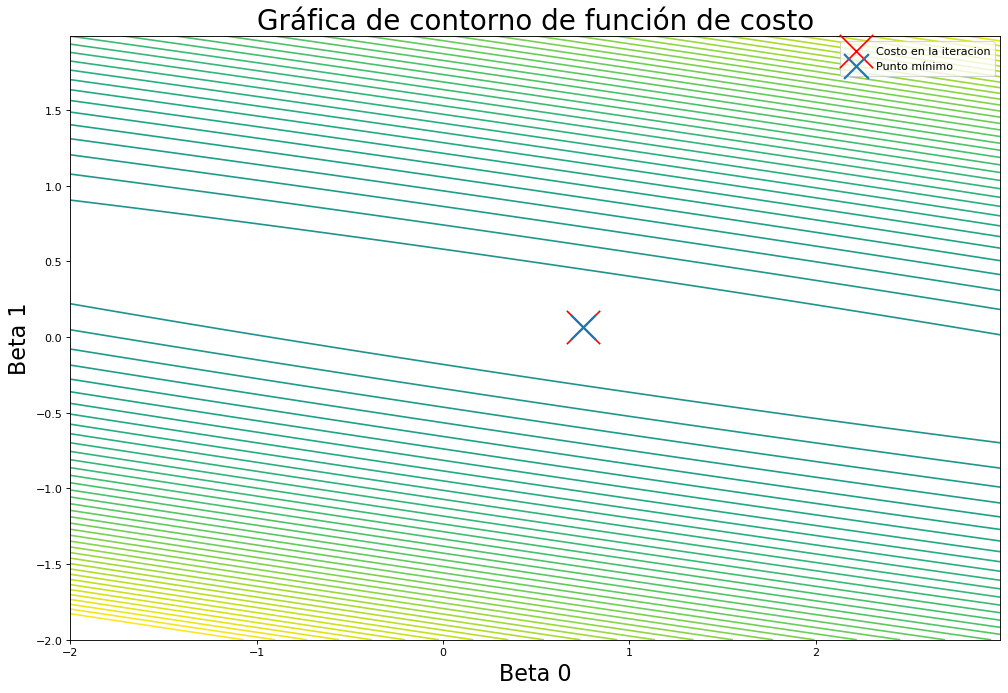

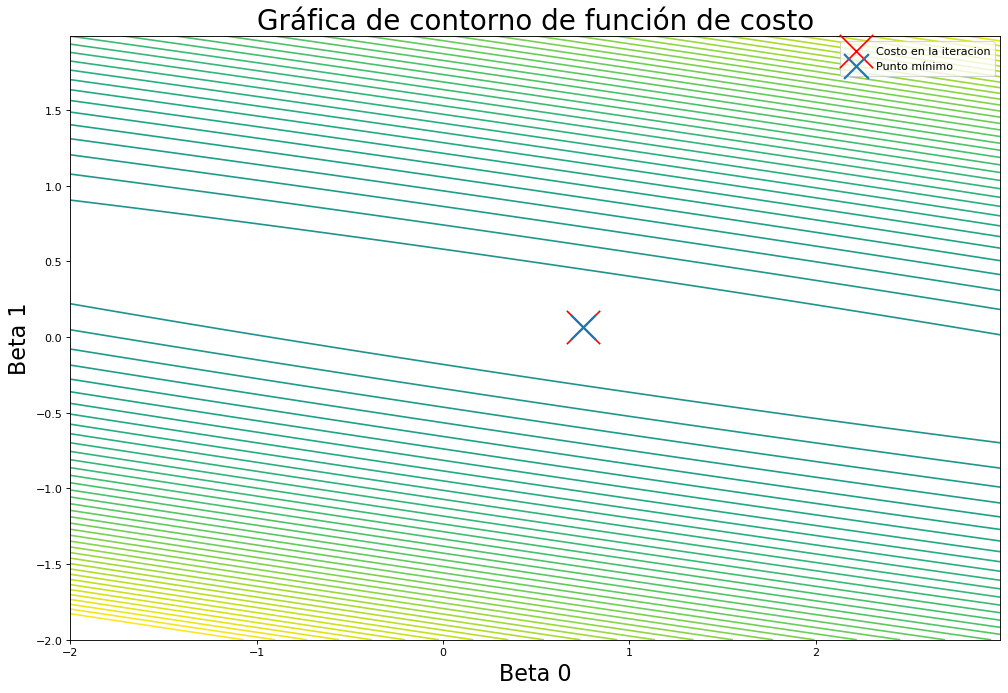

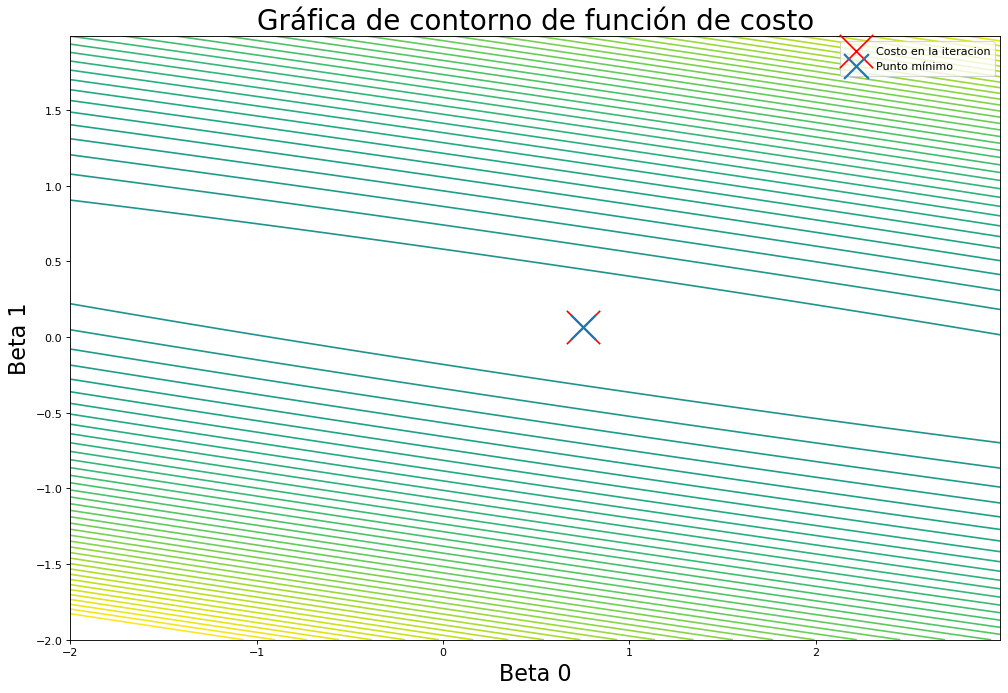

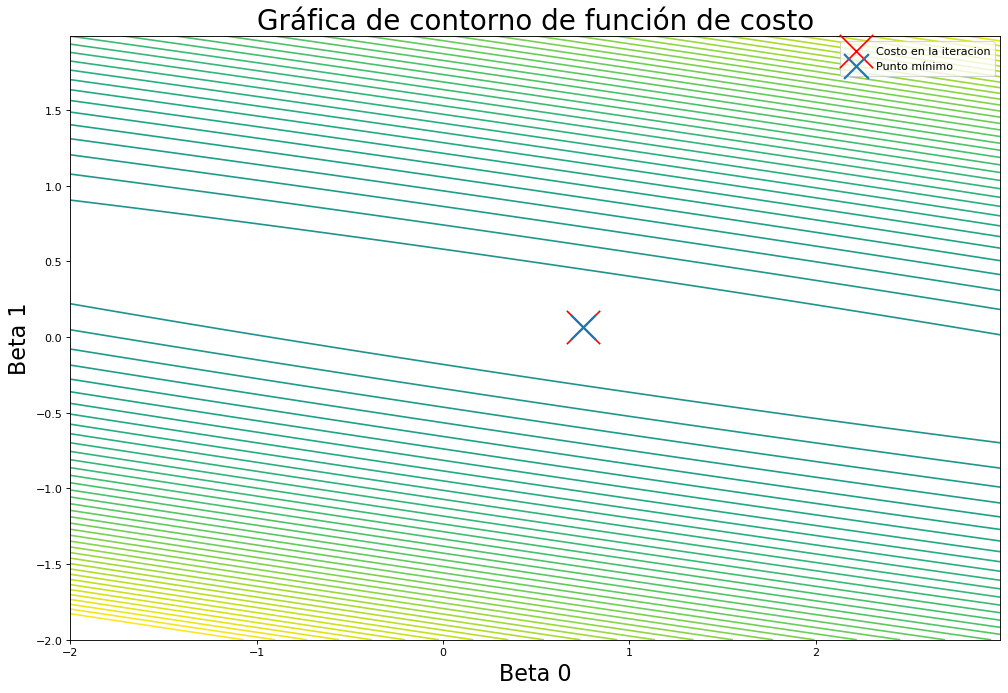

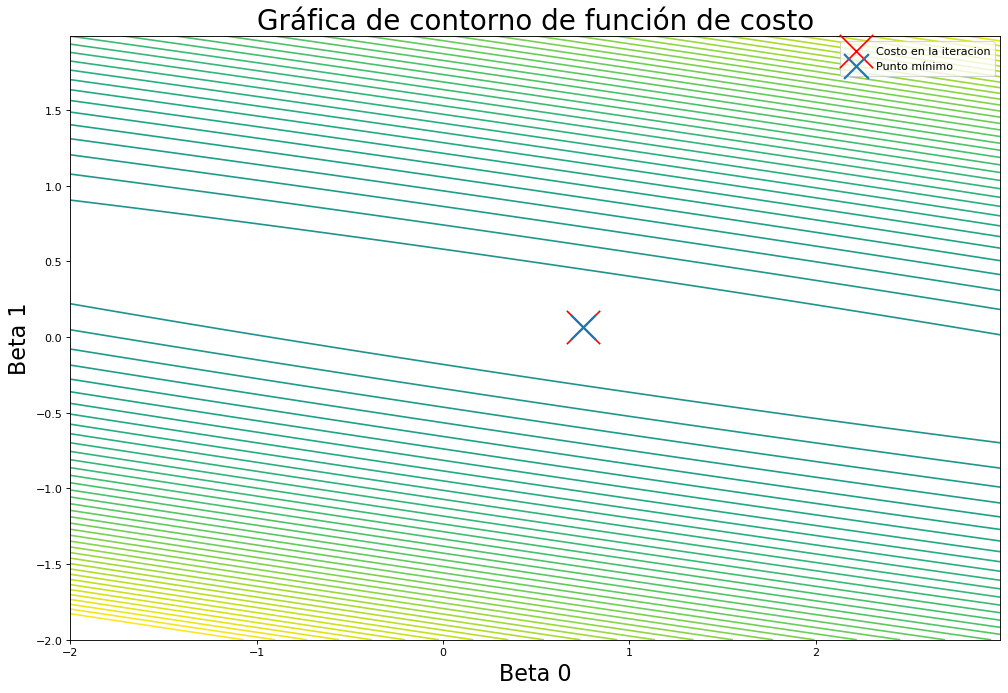

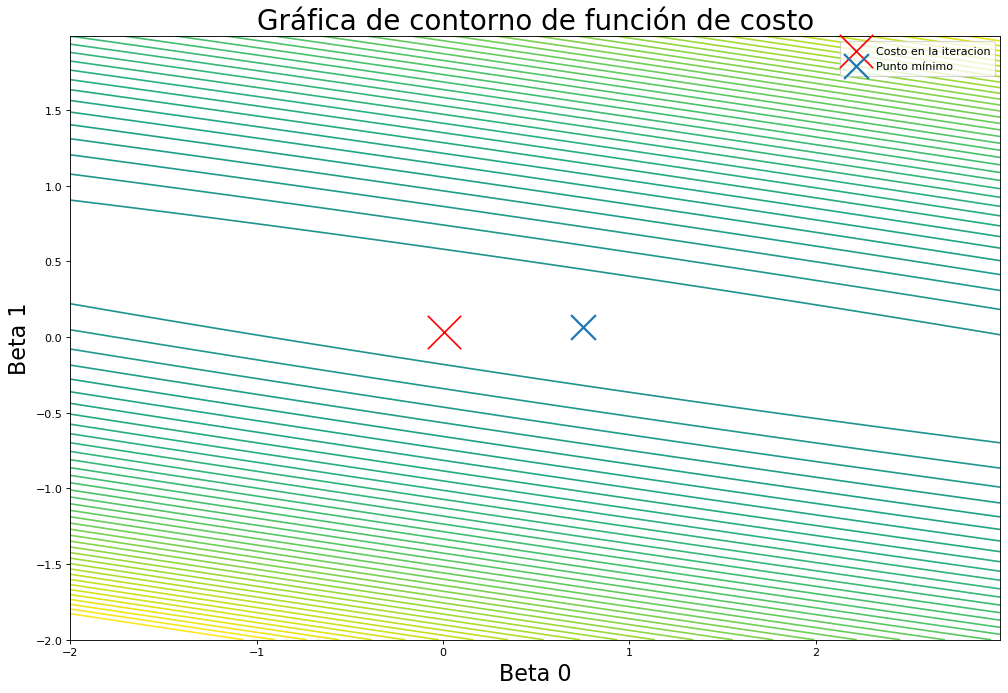

In [308]:
# Agregamos el comando interact para tener el widget con los cambios en las iteraciones y ponemos una marca diferente para las iteraciones que se cambien
def Iteracioncosto(iteracion):
    fig = plt.figure(figsize=(15,10), dpi=80)
    plt.contour(B0,B1,Costo, levels=np.arange(-80,80,2), cmap="viridis")
    plt.scatter(regresion1.historia["beta"][iteracion][0],regresion1.historia["beta"][iteracion][1],c="r",s=900,marker="x", label="Costo en la iteracion")
    plt.scatter(puntominimo[0],puntominimo[1],linewidths=2,marker="x",s=500,label="Punto mínimo")
    plt.legend()
    plt.title("Gráfica de contorno de función de costo", fontsize=25)
    plt.xlabel("Beta 0", fontsize=20)
    plt.ylabel("Beta 1", fontsize=20)

interact(Iteracioncosto, iteracion=(1,regresion1.i-1,10))

**(d)** Agrega al _widget_ un control para modificar $\alpha$ (habrá que agregar el entrenamiento del modelo a la función que estás realizando para este _widget_)

In [309]:
# Hacemos lo mismo pero ahora para el parámetro alpha, por lo que hay que agregar una función que modifique alpha de la clase Regresionlineal
def Modificaralpha(alpha2):
    modif = Regresionlineal(alpha2,10000000,0)
    return modif.gradientdescent(X,Y)
interact(Modificaralpha, alpha2=(.0003,.003,.0001))

interactive(children=(FloatSlider(value=0.0016, description='alpha2', max=0.003, min=0.0003, step=0.0001), Out…

<function __main__.Modificaralpha(alpha2)>

## Problema 3

**(a)**  Usando los datos de `chirps.txt`

In [75]:
%cat chirps-Copy1.txt

#Chirps/Second 	Temperature (º F)
20.0 	88.6
16.0 	71.6
19.8 	93.3
18.4 	84.3
17.1 	80.6
15.5 	75.2
14.7 	69.7
15.7 	71.6
15.4 	69.4
16.3 	83.3
15.0 	79.6
17.2 	82.6
16.0 	80.6
17.0 	83.5
14.4 	76.3


Entrenar una regresión lineal. Grafique los datos y el mejor modelo. Explique como llegó a los valores de $\alpha$. ¿Coinciden con los mostrados en la página web?

In [80]:
# Se toman los datos como una variable de lista y se toman las columnas que se necesitan para la regresión lineal
W=np.loadtxt("chirps-Copy1.txt")
regresion2=Regresionlineal(.003,1000000,0)
regresion2.gradientdescent(W[:,0],W[:,1])

La función convergió con beta: [22.84870914  3.41033933] en la iteración 383397


In [270]:
def Graficar(x,y,R):
    modelo = lambda x,b,m: b + m*x
    iteracion = R.i-1
    Beta = R.historia["beta"][iteracion]
    plt.scatter(x, y, label = "Datos")
    plt.plot(x, modelo(x, Beta[0], Beta[1]),"g")

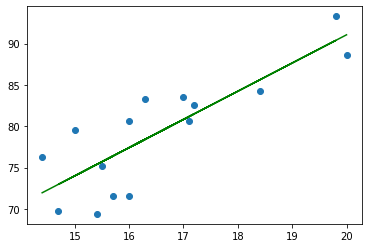

In [271]:
Graficar(W[:,0],W[:,1],regresion2)


**NOTA**: Datos obtenidos de [aquí](http://mathbits.com/MathBits/TISection/Statistics2/linearREAL.htm)


El mejor modelo es la última iteración en la que se alinean los datos a una función lineal. 

Se llega a los valores de $\alpha$ a través de constantes intentos bajo la función $\textbf{J}(\mathbf\beta_0, \mathbf\beta_1)$ que multiplica cada $\alpha$ por el $\nabla g(x,y)$ donde $g(x,y)$ es una función donde cada variable es tomada de una lista de datos comparables.

Sí coinciden con los datos de la página Web. (La optimización está bien hecha).

## Problema 4

**(a)** Usando los datos del [cuarteto de Anscombe](http://en.wikipedia.org/wiki/Anscombe%27s_quartet) Calcule la regresión lineal ¿Qué sucede?

In [150]:
%cat cuarteto_anscombe.txt

#I	II	III	IV
#X	y	X	y	X	y	X	y
10.0	8.04	10.0	9.14	10.0	7.46	8.0	6.58
8.0	6.95	8.0	8.14	8.0	6.77	8.0	5.76
13.0	7.58	13.0	8.74	13.0	12.74	8.0	7.71
9.0	8.81	9.0	8.77	9.0	7.11	8.0	8.84
11.0	8.33	11.0	9.26	11.0	7.81	8.0	8.47
14.0	9.96	14.0	8.10	14.0	8.84	8.0	7.04
6.0	7.24	6.0	6.13	6.0	6.08	8.0	5.25
4.0	4.26	4.0	3.10	4.0	5.39	19.0	12.50
12.0	10.84	12.0	9.13	12.0	8.15	8.0	5.56
7.0	4.82	7.0	7.26	7.0	6.42	8.0	7.91
5.0	5.68	5.0	4.74	5.0	5.73	8.0	6.89


In [310]:
# Se repiten procesos anteriores
C=np.loadtxt("cuarteto_anscombe.txt")
regresion3=Regresionlineal(.003,1000000,0)
regresion3.gradientdescent(C[:,0],C[:,1])

La función convergió con beta: [3.00008683 0.50009131] en la iteración 41286


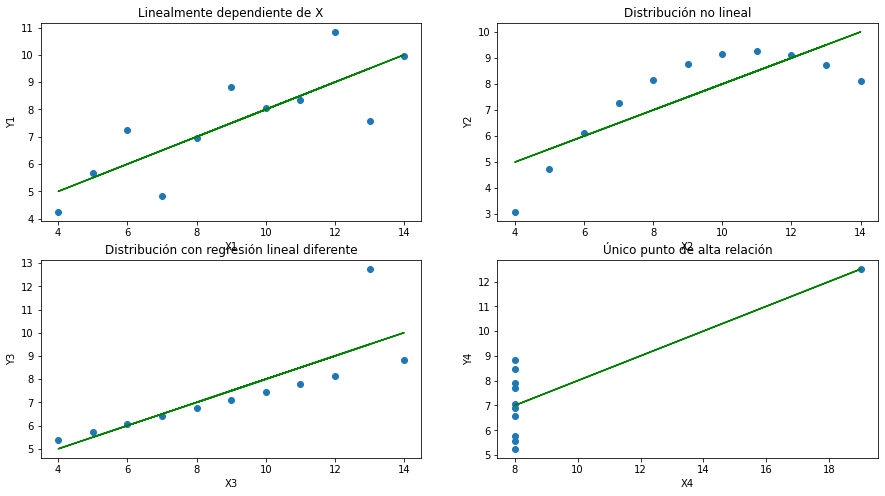

In [320]:
# Por comodidad y para comparar los datos del Cuarteto de Anscombe se hace una visualización simultánea de las 4 gráficas
plt.figure(figsize = (15,8))
plt.subplot(2,2,1)
plt.title("Linealmente dependiente de X")
plt.xlabel("X1")
plt.ylabel("Y1")
Graficar(C[:,0],C[:,1],regresion3)


plt.subplot(2,2,2)
plt.title("Distribución no lineal")
plt.xlabel("X2")
plt.ylabel("Y2")
Graficar(C[:,2],C[:,3],regresion3)

plt.subplot(2,2,3)
plt.title("Distribución con regresión lineal diferente")
plt.xlabel("X3")
plt.ylabel("Y3")
Graficar(C[:,4],C[:,5],regresion3)

plt.subplot(2,2,4)
plt.title("Único punto de alta relación")
plt.xlabel("X4",)
plt.ylabel("Y4")
Graficar(C[:,6],C[:,7],regresion3)

## Problema 5

Use el archivo `radioactive_decay.dat`

In [156]:
%cat radioactive_decay-Copy1.txt

#time   N_(remaining)
0.0	10.48
1.0	7.54
2.0	5.49
3.0	4.02
4.0	2.74
5.0	2.02
6.0	1.50
7.0	1.09
8.0	0.68
9.0	0.57
10.0	0.37
11.0	0.31
12.0	0.19
13.0	0.15
14.0	0.13
15.0	0.11


**(a)** Grafique los datos ¿Qué forma tienen?

La función convergió con beta: [ 6.45691016 -0.54933808] en la iteración 18655


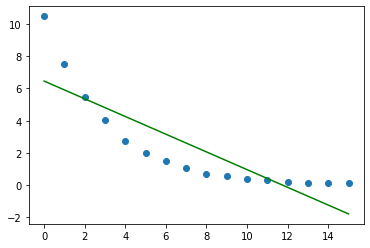

In [323]:
# Repiten procesos anteriores
R=np.loadtxt("radioactive_decay-Copy1.txt")
regresion4=Regresionlineal(.003,1000000,0)
regresion4.gradientdescent(R[:,0],R[:,1])
Graficar(R[:,0],R[:,1],regresion4)

Tienen forma convexa.

**(b)** ¿Qué transformación se le ocurre para linearizarlos? Explique y grafique de nuevo. Guarde los datos transformados en un archivo llamado `transform_radioactive_decay.txt`

Dado que es una función de apariencia exponencial, podemos hacer una composición entre funciones, donde la inversa de la función $\textbf{f}(x)=\exp(x)$ es la función $\textbf{f}^{-1}(x)=\log(x)$ 

De manera que si  $\exp(x)=y$  entonces  $\log(y)=x$

Entonces alplicamos función $\log(y)$ a la variable del modelo $\textbf{y}$ para linealizar los datos.

In [324]:
regresion4.gradientdescent(R[:,0],np.log(R[:,1]))

La función convergió con beta: [ 2.29661472 -0.31664834] en la iteración 19651


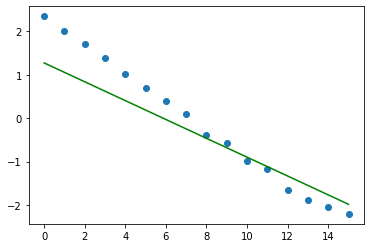

In [325]:
Graficar(R[:,0],np.log(R[:,1]),regresion4)

In [359]:
# Guardamos los datos que generamos con la función logaritmo
np.savetxt("transform_radioactive_decay.txt",np.log(R[:,1]))

**(c)** Aplique la regresión lineal a este conjunto de datos transformado, leyendo los datos del archivo recién creado.

In [368]:
# Creamos una variable para leer los datos del archivo y aplicamos gradientdescendet de la clase Regresionlineal a la regresion4
R2=np.loadtxt("transform_radioactive_decay.txt")
regresion4.gradientdescent(R[:,0],R2)

La función convergió con beta: [ 2.29661472 -0.31664834] en la iteración 19651


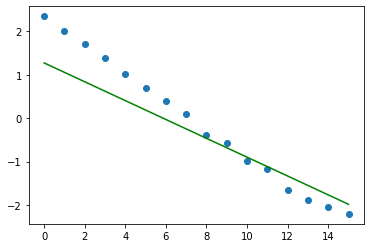

In [369]:
#Checamos la función Graficar para comparar resultados
Graficar(R[:,0],R2,regresion4)

**(d)** ¿Cuáles son los valores de $\beta$ que mejor ajustan? ¿Cuáles son el espacio sin transformar? Explique.

Según el modelo de Regresión lineal, los valores de $\beta_0$ y $\beta_1$ que más se aproximan a la optimización para la regresión lineal son los siguientes:

In [403]:
regresion4.beta[0]

2.2966147231496334

In [404]:
regresion4.beta[1]

-0.31664834171874334

No hay espacio sin transformar ya que al ser una funcíon continua y aplicarle una transformación lineal ocupa todo el espacio.

In [385]:
def Graficartrans(x,y,R):
    modelo = lambda x,b,m: np.exp(b + m*x)
    iteracion = R.i-1
    Beta = R.historia["beta"][iteracion]
    plt.scatter(x, y, label = "Datos")
    plt.plot(x, modelo(x, Beta[0], Beta[1]),"r")

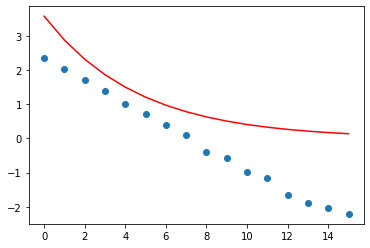

In [399]:
Graficartrans(R[:,0],R2,regresion4)

In [373]:
def Graficartrans(x,y,R):
    modelo = lambda x,b,m: b + m*x
    iteracion = R.i-1
    Beta = R.historia["beta"][iteracion]
    plt.scatter(x, y, label = "Datos")
    plt.plot(x, modelo(x, Beta[0], Beta[1]),"g")

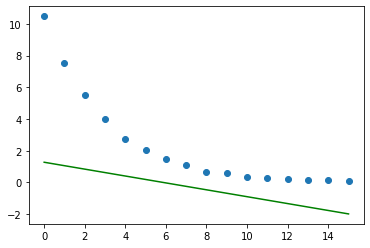

In [374]:
Graficartrans(R[:,0],R[:,1],regresion4)

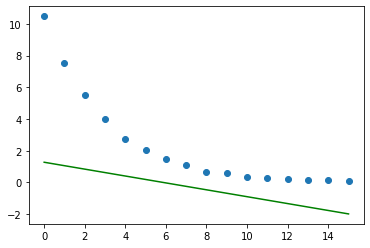

In [375]:
Graficartrans(R[:,0],R[:,1],regresion4)

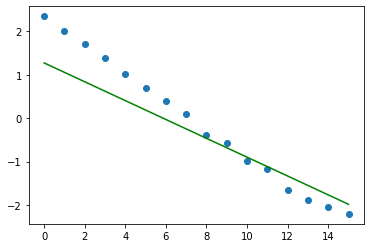

In [376]:
Graficartrans(R[:,0],np.log(R[:,1]),regresion4)

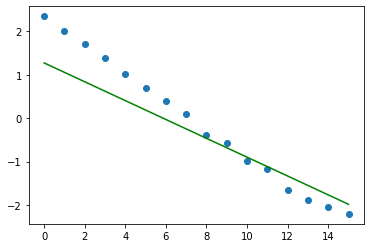

In [377]:
Graficar(R[:,0],np.log(R[:,1]),regresion4)

In [396]:
# Ocupo la función definida en clase para graficar el modelo con iteraciones exactas y comparadas
def plotModelo(x,y,rl,iteracion):
    modelo = lambda x,b,m: b + m*x 
    
    _beta = rl.historia['beta'][iteracion]

    fig, ax = plt.subplots(1,2, figsize=(10,6))
    ax[0].scatter(x,y, label="datos")
    ax[0].plot(x, modelo(x, _beta[0], _beta[1]),"r", label="int: %1.2f, pen: %1.2f" % (_beta[0], _beta[1]))
    ax[0].set_xlabel('Edad (yr)')
    ax[0].set_ylabel('Altura (m)')
    ax[0].legend(loc="best")
    #ax[0].set_xlim(0, max(x))
    #ax[0].set_ylim(0, max(y))
    
    costo  = rl.historia['costo']
    
    iteraciones = [i for i in range(0, len(costo))]
    ax[1].plot(iteraciones, costo, 'g', label="costo")
    ax[1].plot(iteracion, costo[iteracion], 'or', label="iteracion")
    ax[1].set_xlabel('Iteraciones')
    ax[1].set_ylabel('Costo')
    ax[1].legend(loc="best")

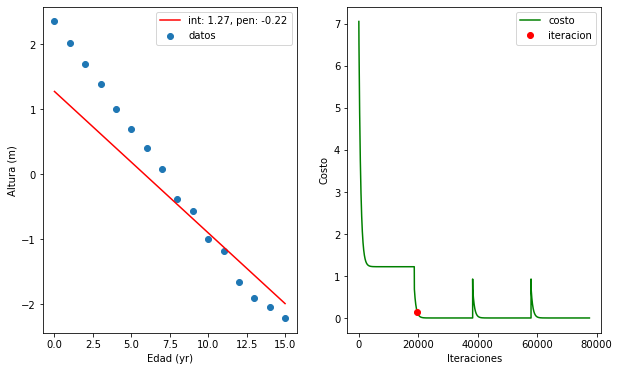

In [400]:
plotModelo(R[:,0],R2,regresion4,19651)

In [394]:
# Ocupo la misma función pero modificando el modelo "y" a una función exponencial para aproximarla a los datos
def plotModelo2(x,y,rl,iteracion):
    modelo = lambda x,b,m: np.exp(b + m*x)
    
    _beta = rl.historia['beta'][iteracion]

    fig, ax = plt.subplots(1,2, figsize=(10,6))
    ax[0].scatter(x,y, label="datos")
    ax[0].plot(x, modelo(x, _beta[0], _beta[1]),"r", label="int: %1.2f, pen: %1.2f" % (_beta[0], _beta[1]))
    ax[0].set_xlabel('Edad (yr)')
    ax[0].set_ylabel('Altura (m)')
    ax[0].legend(loc="best")
    #ax[0].set_xlim(0, max(x))
    #ax[0].set_ylim(0, max(y))
    
    costo  = rl.historia['costo']
    
    iteraciones = [i for i in range(0, len(costo))]
    ax[1].plot(iteraciones, costo, 'g', label="costo")
    ax[1].plot(iteracion, costo[iteracion], 'or', label="iteracion")
    ax[1].set_xlabel('Iteraciones')
    ax[1].set_ylabel('Costo')
    ax[1].legend(loc="best")

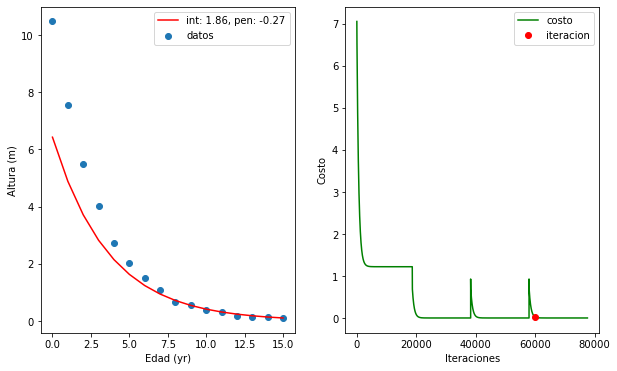

In [395]:
plotModelo2(R[:,0],R[:,1],regresion4,60000)